<a href="https://colab.research.google.com/github/EternalRaininNovember/test0/blob/main/%D0%92%D0%B4%D0%BE%D0%B2%D0%B8%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_1_%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B1%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D1%82%D1%80%D0%B5%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats
#from mpl_toolkits.basemap import Basemap

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA


from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import pylab as py


from scipy.stats import shapiro
from matplotlib.cm import ScalarMappable

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, fbeta_score, precision_recall_curve, roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


%matplotlib inline


In [ ]:
!git clone https://github.com/EternalRaininNovember/test0.git

Cloning into 'test0'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 4), reused 2 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 938.53 KiB | 6.95 MiB/s, done.
Resolving deltas: 100% (4/4), done.


# 1. EDA и выбор метрики

Набор данных состоит из 9 различных категориальных и непрерывных параметров 4000 различных яблок, содержит информацию о различных атрибутах набора фруктов, что дает представление об их физических характеристиках.

In [ ]:
path = 'test0/apple_quality.csv'
data = pd.read_csv(path)



Датасет включает в себя такие непрерывные характеристики такие как, размер, вес, сладость, хрусткость, сочность, спелость и кислотность, и категориальную характеристику "качество" (яблоко хорошее или плохое) - переменная как вывод, полученный на основе предущих характеристик.

In [ ]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [ ]:
data.head(4001)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
data.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
df = data.copy().dropna()

In [ ]:
type(df['Acidity'][1])

str

In [ ]:
df['Acidity'] = df['Acidity'].astype(float)

In [ ]:
df.shape

(4000, 9)

In [ ]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

Набор данных полный, отсутствуют пропуски.
Изначально столбец "Acidity" (Кислотность) - имел тип object. Это является ошибкой, т.к. в нем хранятся числовые данные. Видимо из-за подписи на последней строке при прочтении тип str был приписан каждому элементу столбца.

## Numerical columns (Столбцы с числовыми значениями)

In [ ]:
num_cols = df.select_dtypes(exclude='object')
num_cols.shape

(4000, 8)

In [ ]:
num_cols.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [ ]:
num_cols.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


"The dataset was generously provided by an American agriculture company. The data has been scaled and cleaned for ease of use.
If you find this dataset useful, your support through an upvote would be greatly appreciated ❤️🙂 Thank you." - комментарии автора к датасету.

Значение характеристик написано в таких единицах (к которым отсутствует пояснение на странице датасета), что размер и вес яблока, интуитивно понятные характеристики, значения которых измеряются, например, в сантиметрах (если объем, то сантиметры кубические) и граммах, могут принимать отрицательные значения. (Кислотность (Acidity) измеряется в Ph, но в этом случае величина положительна.)

Можно предположить, что записанные данные представляют собой не прямые характеристики отдельного фрукта, а относительные - по сравнению с некоторым образцовым яблоком, при чем т.к. среднее значение размера и веса не 0, то данные, если они и вправду относительные, относительны по сравнению с каким-то конкретным яблоком, а не "усредненным". Условно могли измерить массу яблока и написать его отклонение массы относительно массы некоторого "образцового" яблока.

Такая характеристика, как сладкость (sweetness) или сочность (juiciness), может быть проверена только при поедании яблока, поэтому можно предположить, что данные записанные в таблице - это некоторая эмпирическая оценка от, например, волонтеров, которые эти яблоки сьели.

## Выбор метрики и категориальная переменная



Категориальная переменная единственная и принимает бинарные значения (good или bad). Можно перевести их в числовые значения, чтобы использовать дальше.

In [ ]:
cat_cols = df.select_dtypes(include='object')
cat_cols.describe()

,Quality
count,4000
unique,2
top,good
freq,2004


Данный датасет можно использовать, например, для задачи классификации (задача определить яблоко хорошее или плохое).
Бинарная характеристика сбалансирована, что позволяет использовать метрику точности (Accuracy).
Для проверки классификатора также будет использована F-метрика, отдав предпочтение точности (Precision) и кривая ROC.

Поясню на примере.

Представим, что покупатель в магазине выбирает яблоки. Разделяя яблоки на хорошие и плохие (условно "на глаз"), он хочет купить хорошие яблоки, чтобы при этом в его корзине было как можно меньше плохих яблок. Очевидно, что покупатель будет брать те яблоки, которые ему понравились (классифицировал как хорошие) и при этом не хочет ошибиться, хочет минимизировать False Positive, т.е. увеличить точность.

In [ ]:
le = LabelEncoder()
for c in cat_cols.columns:
  df[c] = le.fit_transform(cat_cols[c])

In [ ]:
 df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


## Зависимость сладкости от других характеристик яблока

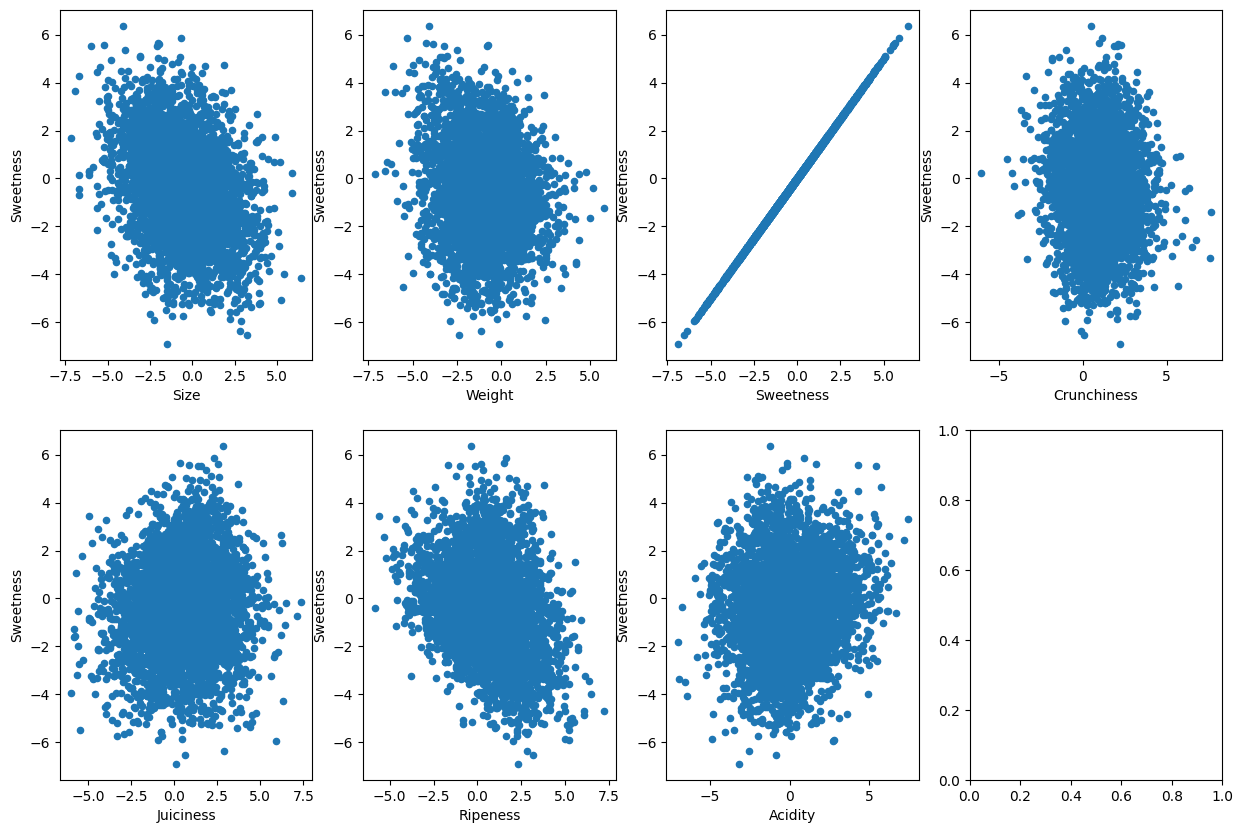

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(num_cols.columns[1:]):
    df.plot(feature, "Sweetness", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

Явной зависимости сладкости (Sweetness) от других параметров яблока не наблюдается.

## Выбросы

In [ ]:
num_cols.columns[1:]

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

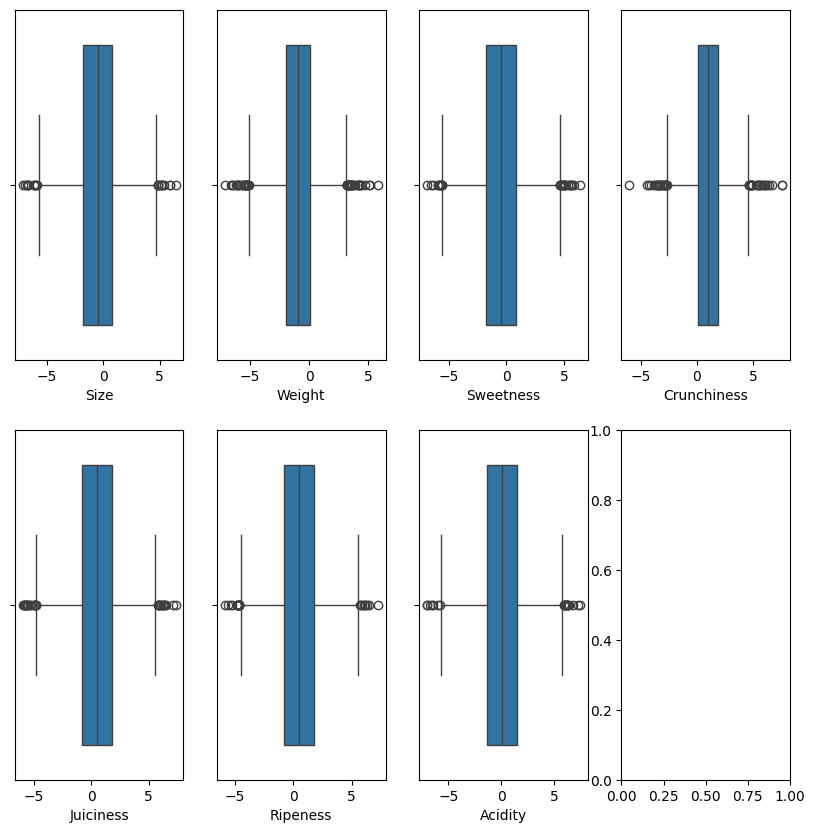

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))
count = 0
for idx, feature in enumerate(num_cols.columns[1:]):
    sns.boxplot(x=df[feature], ax=axes[count // 4, count % 4])
    count += 1

In [ ]:
for col in num_cols.columns[1:]:
    print(f'Outliers for {col} column: {boxplot_stats(df[col]).pop(0)["fliers"]}\n')

Outliers for Size column: [-6.12966814 -5.97503209 -6.69012085 -6.90580317 -5.87977074 -6.66972475
 -6.71331515 -6.7101689  -6.08771509 -7.15170306 -6.09955143  5.18962445
  5.8662318   6.4063669   5.40327575  4.83460754  4.79968343  4.84241429
  5.07403149  5.22538346  5.10436377  5.86586054]

Outliers for Weight column: [-6.23510704 -5.10310447 -5.22708663 -6.55668451 -5.90873574 -5.47868222
 -5.59234342 -5.4137325  -6.00074762 -6.58158967 -5.57070479 -5.74638367
 -5.34307646 -5.18741627 -5.54229026 -6.42807547 -5.275557   -5.2398298
 -5.25429044 -6.08689375 -7.14984768 -5.36771094 -6.01055919  5.1490003
  3.60328608  4.73822681  3.2853013   4.36306592  3.82109404  3.59869043
  3.44081133  4.1513682   3.55630685  3.1830111   4.36957149  3.33282145
  4.09388841  3.16426325  3.20789559  3.5117579   3.21976202  3.2652455
  3.30401719  3.51614243  4.17136053  3.52232224  3.77217281  4.09971122
  5.01400211  4.20264313  3.46039566  3.15796135  3.16437031  5.79071359]

Outliers for Sweetne

В датасете нет выбросов отличающихся на порядки от других выбросов. Для каждого выброса есть выброс с похожим значением.

Возможно, эти значения принадлежат какому-то отдельному сорту яблок.

В виду отстутствия информации о происхождении датасета отделять выбросы от основного массива данных и проводить более детальный анализ выбросов считаю не целесообразным.

## Распределение числовых характеристик

Посмотрим на распределения характеристик и проверим их на принадлежность к нормальному распределению

<Axes: xlabel='Acidity', ylabel='Density'>

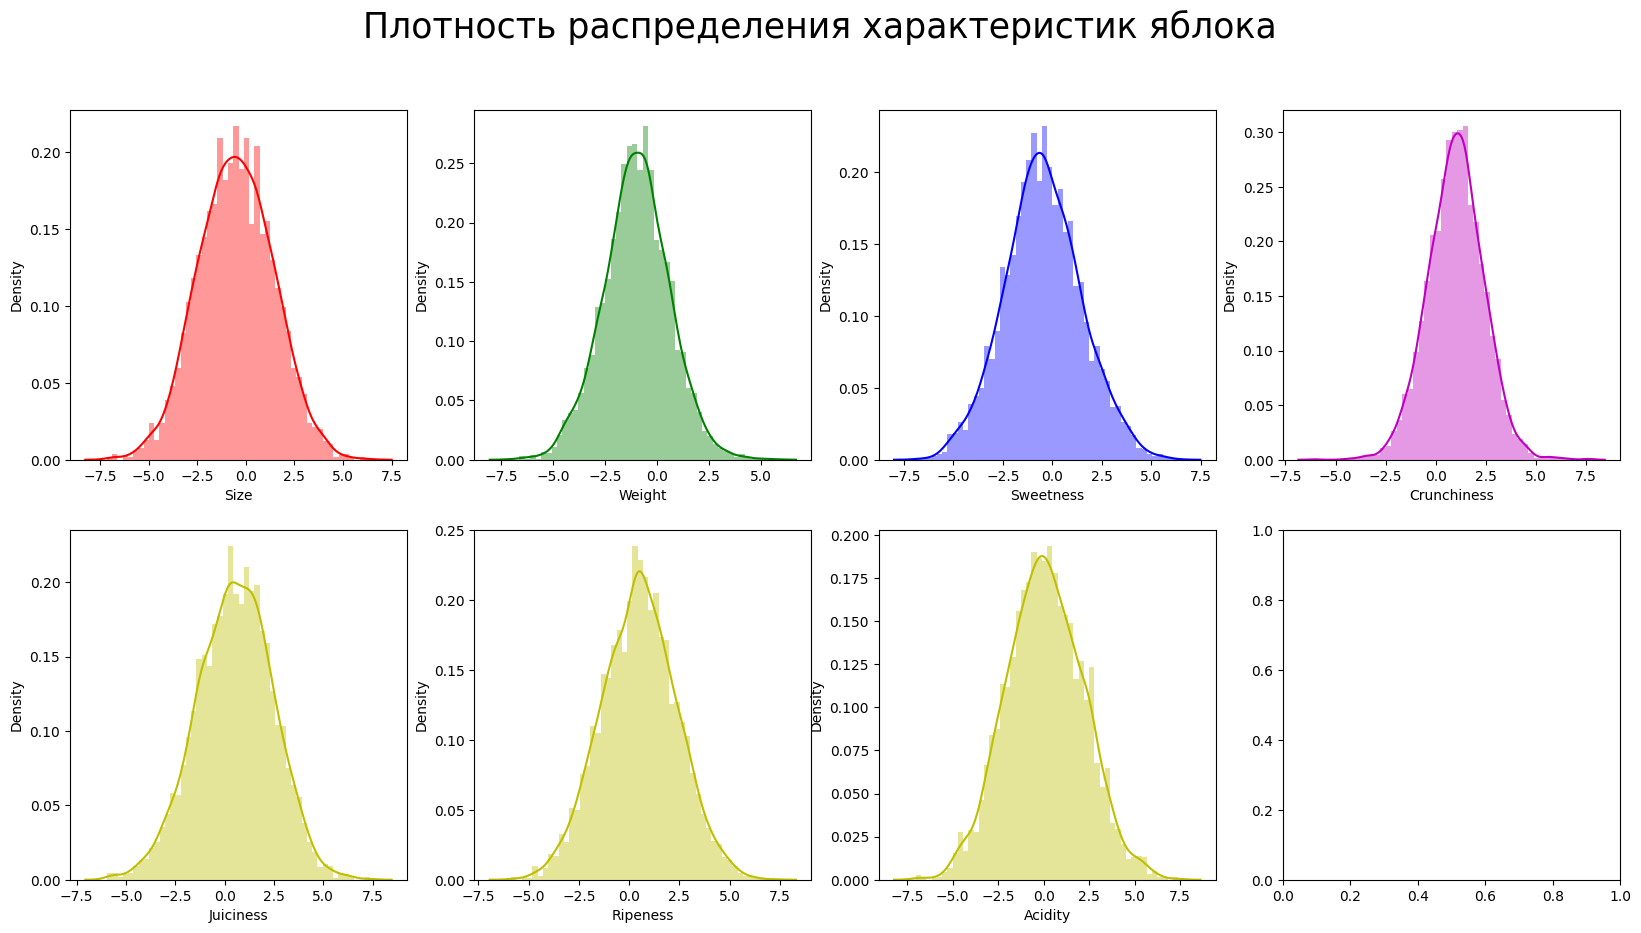

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Плотность распределения характеристик яблока', fontsize=25)
sns.distplot(df[num_cols.columns[1]], bins=50, color='r', ax=axes[0, 0])
sns.distplot(df[num_cols.columns[2]], bins=50, color='g', ax=axes[0, 1])
sns.distplot(df[num_cols.columns[3]], bins=50, color='b', ax=axes[0, 2])
sns.distplot(df[num_cols.columns[4]], bins=50, color='m', ax=axes[0, 3])
sns.distplot(df[num_cols.columns[5]], bins=50, color='y', ax=axes[1, 0])
sns.distplot(df[num_cols.columns[6]], bins=50, color='y', ax=axes[1, 1])
sns.distplot(df[num_cols.columns[7]], bins=50, color='y', ax=axes[1, 2])



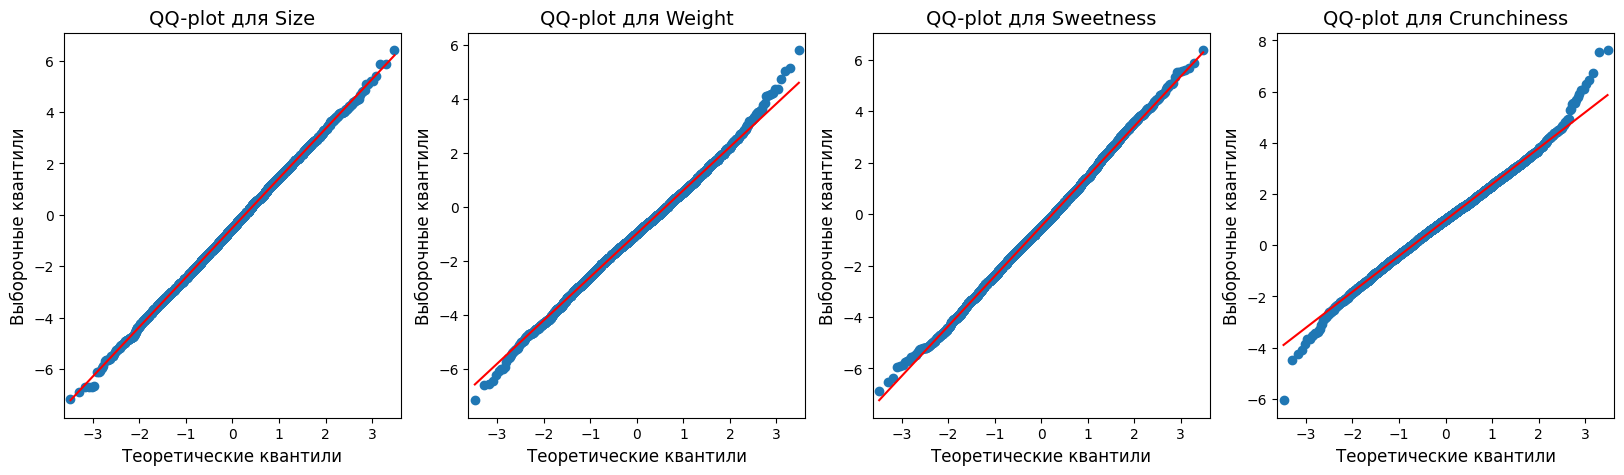

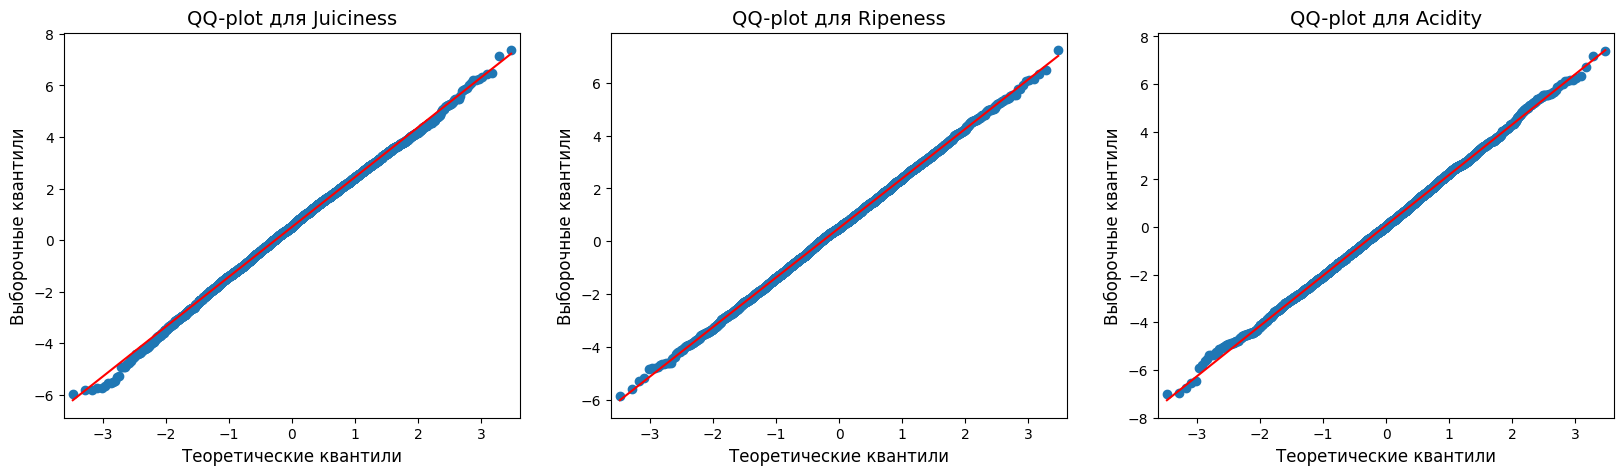

In [ ]:


fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
  sm.qqplot(df[num_cols.columns[i+1]], line='s',ax=axes[i])
  axes[i].set_title(f'QQ-plot для {num_cols.columns[i+1]}', fontsize=14)
  axes[i].set_xlabel('Теоретические квантили', fontsize=12)
  axes[i].set_ylabel('Выборочные квантили', fontsize=12)
py.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i in range(4,7):
  sm.qqplot(df[num_cols.columns[i+1]], line='s',ax=axes[i%4])
  axes[i%4].set_title(f'QQ-plot для {num_cols.columns[i+1]}', fontsize=14)
  axes[i%4].set_xlabel('Теоретические квантили', fontsize=12)
  axes[i%4].set_ylabel('Выборочные квантили', fontsize=12)
py.show()


In [ ]:
from scipy.stats import shapiro
for  i in range(1,8):
  print("p_value = "+str(round(shapiro(df[num_cols.columns[i]]).pvalue,3))+' для '+str(num_cols.columns[i]))

p_value = 0.785 для Size
p_value = 0.001 для Weight
p_value = 0.013 для Sweetness
p_value = 0.0 для Crunchiness
p_value = 0.008 для Juiciness
p_value = 0.841 для Ripeness
p_value = 0.161 для Acidity


Для проверки на нормальность можно воспользоваться как визуальным методом QQ-plot так и статистическим, например, критерием Шапиро-Уилка.

QQ-plot дает визуально сравнить распределение с нормальным ( с таким же средним и отклонением - line='c'). Обозрительно  все характеристики в целом попадают на эту прямую, но у некоторых характеристик (weight и crunchiness) на концах есть хвосты. Следует провести более глубокий анализ, чтобы понять поддаются ли величины нормальному распределению.

Используя критерий Шапиро-Уилка, для характеристик яблока таких как,  $\textbf{Weight, Sweetness, Crunchiness, Juiciness}$,  величина $\text{p-value} $ оказывается меньше порогового значения ($\text{p-value}<0.05$), следовательно **нулевая гипотеза о принадлежности выборок к нормальному распределению отвергается**.


Для характеристик $\textbf{Size,Ripeness,Acidity}$ величина $\text{p-value} $ больше  порогового значения ($\text{p-value}>0.05$), **нулевая гипотеза не отвергается** (но и не подтверждается).

## Матрица корреляций

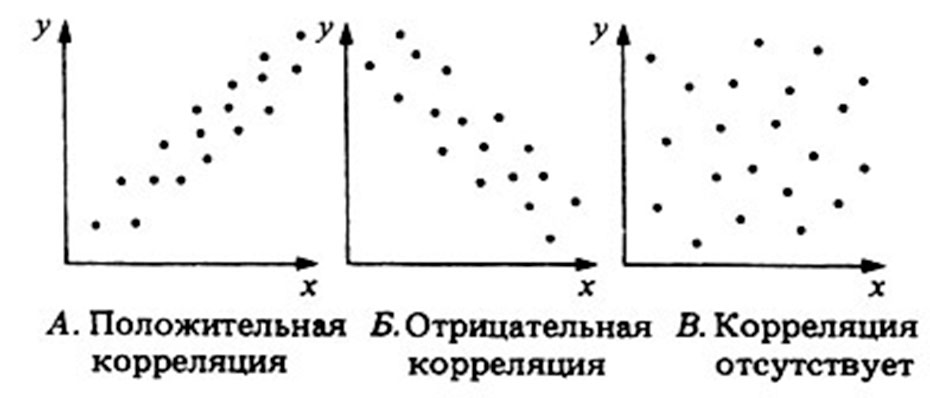

In [ ]:
num2=df[df.columns[1:]]
plt.figure(figsize=(10,10))
corr_matrix = num2.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')
#sns.heatmap(num_cols.corr(), cmap="RdYlBu_r");

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


<Figure size 1000x1000 with 0 Axes>

Корреляция отсутствует между характеристиками в большинстве случаев, однако некоторые значения в таблице достигают значений -0.2 и -0.3 .

Таким значениям можно попытаться дать интерпретацию, основанную на эмпирическом личном опыте, но она будет довольно сомнительной.

Наиболее сильная корреляция выражается в том, что сладкость яблока уменьшается при увеличении его размера. (Логичная интерпретация, что яблоки **показались** менее сладкими при увеличении размера.)

Такое можно ожидать, маленькие яблоки часто бывают сочные, также концентрация сахарозы при меньших размерах плода может быть больше.

Но с другой стороны, вкусовые качества сильно зависят от [сорта яблок](https://cyberleninka.ru/article/n/issledovanie-himicheskogo-sostava-yablok-razlichnyh-sortov-proizrastayuschih-v-hozyaystvah-krasnodarskogo-kraya/viewer)

## Визуализация при помощи PCA
Посмотрим получится ли классифицировать хорошие и плохие яблоки в 2-ом и 3-ом пространствах

In [ ]:
df_new = df.iloc[:, 1:7]
scaler = StandardScaler()
dfs=scaler.fit_transform(df_new)

In [ ]:
model = PCA(n_components=2)
model.fit(dfs)
pca_coords = model.transform(dfs)
#pca_coords[:5]

In [ ]:
#df_class=df[num_cols.columns[1]]
df_class=df[cat_cols.columns[0]]

In [ ]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
})

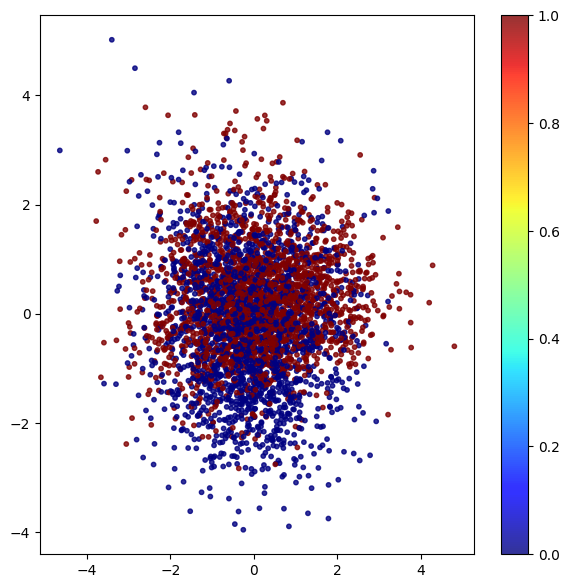

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

plt.scatter(pca_coords[:, 0], pca_coords[:, 1],
            c=df_class, cmap='jet', s=10, alpha = 0.8)
plt.colorbar()
plt.show()

3D

In [ ]:
model = PCA(n_components=3)
model.fit(dfs)
pca_coords = model.transform(dfs)
#pca_coords[:5]

In [ ]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
    'pca3': pca_coords[:, 2],
})

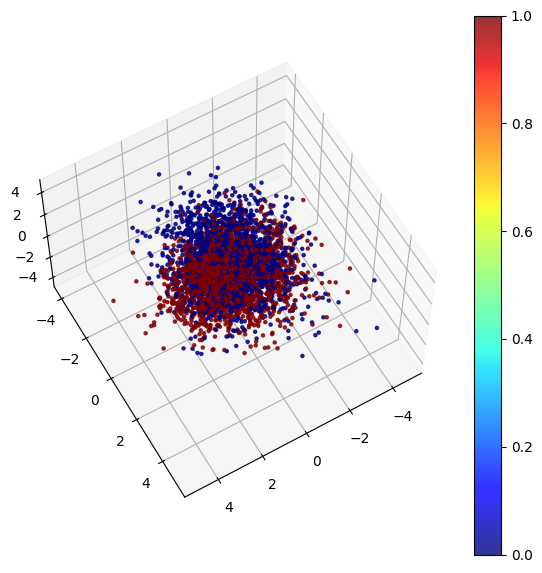

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60, azim=60)
p=ax.scatter(pca_coords[:, 0], pca_coords[:, 1], pca_coords[:, 2],
            c=df_class, cmap='jet', s=5, alpha = 0.8)
fig.colorbar(p)

plt.show()


Четкого различия "качества" в 2-ом и 3-мерном пространстве не наблюдается.

Т.к. "данные сильно перемешаны", то при решении задачи классификации можно ожидать невысокие метрики качества и F1.

Следует отметить, что автор данного датасета не объяснил ни характеристики, написанные в заголовках столбцов, ни то, как они были получены, к данным есть вопросы, например:

*   Что означает отрицательная масса или размер (до этого я выдвигал предположение о том, что это могло означать);
*   Откуда брались значения кислотности (acidity) или сладкости (sweetness) до 9 знаков после запятой;
*   Какие сорта яблок использовались.

На момент 03.02. заданы вопросы к [датасету](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/discussion/471663#2633200) на kaggle, ответ не получен.




# Модель и проверка качества по метрикам

##Классификаторы
Сравним классификаторы:
*   Dummy Classifier
*   Logistic Regression
*   Random Forest

По метрикам:
*   Accuracy
*   F-мера
*   AUC ROC

(Обоснование использование метрики Accuracy и F-меры написано ввыше в пункте "Выбор метрики и категориальная переменная")

Разобьем датасет на две части:
1.   Информация об атрибутах яблока (размер, вес и др.)
2.   Информация о качетсве яблока (хорошее или плохое)
И выберем оттуда тестовую выборку - 1/4 от всего датасета


In [ ]:
Кdf1=df.iloc[:, 1:7]

In [ ]:
df2=df.iloc[:, 8]

In [ ]:


# 0 – "плохое яблоко"
# 1 – "хорошее яблоко"
y = df2
x = df1
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2023, test_size=0.25)

###DummyClassifier
 Присваивает всем объектам принадлежность к наиболее частому встречающемуся классу

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train);
y_pred_dummy = dummy_clf.predict(X_test)

###Логистическая регрессия

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train);
y_pred_log_reg = log_reg.predict(X_test)
y_pred_lg = log_reg.predict_proba(X_test)[:, 1]

###RandomForest

In [ ]:

# Random forest classifier
rf_model = RandomForestClassifier(n_estimators=400, n_jobs=1, random_state=2023)
rf_model.fit(X_train,y_train)

# predict
y_pred_rf = rf_model.predict(X_test)
y_pred_rf2 = rf_model.predict_proba(X_test)[:, 1]

##Проверка качества
Проверим наши классификаторы в соответствии с описанными выше метриками.

### Accuracy

In [ ]:
print(f'Accuracy для Dummy Classificator : {accuracy_score(y_test, y_pred_dummy)}')
print(f'Accuracy для Logistic regression : {accuracy_score(y_test, y_pred_log_reg)}')
print(f'Accuracy для Random Forest : {accuracy_score(y_test, y_pred_rf)}')

Accuracy для Dummy Classificator : 0.494
Accuracy для Logistic regression : 0.753
Accuracy для Random Forest : 0.87


### F-мера
Для сравнения классификаторов будем использовать F-меру
$$ F_{\beta}=(\beta^2+1)\frac{\text{Recall} \cdot \text{Precision}
}{\text{Recall} +\beta^2  \text{Precision} }$$

В случае, когда $\beta = 1$ precision и recall имеют одинаковый вклад в метрику. При $0 < \beta < 1$ больший вклад имеет precision, при $\beta > 1$ - recall.

Выберем $\beta = 0.5$  

In [ ]:
print(f'Fbeta-score для Dummy Classificator: {fbeta_score(y_test, y_pred_dummy, beta=0.5)}')
print(f'Fbeta-score для Logistic regression: {fbeta_score(y_test, y_pred_log_reg, beta=0.5)}')
print(f'Fbeta-score для Random Forest: {fbeta_score(y_test, y_pred_rf, beta=0.5)}')

Fbeta-score для Dummy Classificator: 0.0
Fbeta-score для Logistic regression: 0.7498116051243405
Fbeta-score для Random Forest: 0.8639846743295019


### ROC-кривая

Вводится 2 метрики TPR и FPR.

TPR показывает долю элементов класса 1 (Positive), которая была верно предсказана. Другими словами это отношение количества верно предсказанных, положительных элементов к количеству всех положительных элементов

$$TPR=\frac{TP}{P}=\frac{TP}{TP+FN} $$
FPR показывает долю элементов класса 0 (Negative), которая была неверно предсказана. Другими словами это отношение количества неверно предсказанных, положительных элементов к количеству всех негативных элементов
$$FPR=\frac{FP}{N}=\frac{FP}{FP+TN} $$

ROC - кривая зависимости TPR(FPR).
О том, как строится AUC ROC написано в [статье](https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/)


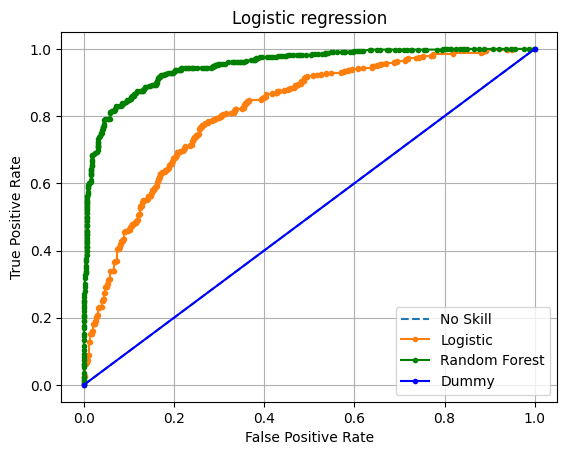

In [ ]:
y_pred = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lg)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf2)
fpr_d, tpr_d, thresholds_d = roc_curve(y_test, y_pred_dummy)
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.plot(fpr_rf, tpr_rf, marker='.', c='g', label='Random Forest')
plt.plot(fpr_d, tpr_d, marker='.', c='b', label='Dummy')
#plt.plot(fpr,-fpr+2*np.sqrt(fpr), label='Lineary distribution')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression')
plt.legend()
plt.grid()
plt.show()


In [ ]:
print(f'AUC ROC для Dummy Classificator: {roc_auc_score(y_test,y_pred_dummy)}')
print(f'AUC ROC для Logistic Regression: {roc_auc_score(y_test,y_pred_lg)}')
print(f'AUC ROC для Random Forest : {roc_auc_score(y_test,y_pred_rf)}')


AUC ROC для Dummy Classificator: 0.5
AUC ROC для Logistic Regression: 0.8151333792066058
AUC ROC для Random Forest : 0.8697412427389543


метод Random Forest дает наилучшие показатели по метрикам  Accuracy, F1-beta, AUC ROC при сравнении с другими методами Logistic Regression and Dummy Classificator.

#Вывод

Проведен EDA для датасета. Отчетливые корреляции между характеристиками не выявлены. Есть некоторые сомнительные корреляции, например, размера и сладкости, а также сочности и качества яблок.

Проведена проверка на нормальность распределения характеристик. Характеристики Weight, Sweetness, Crunchiness, Juiciness не распределены нормально.


Проведен сравнительный анализ классификаторов по метрикам.
Метод Random Forest дает наилучшие показатели по метрикам  Accuracy, F1-beta, AUC ROC при сравнении с другими методами (Logistic Regression и Dummy Classificator).